In [1]:
##################################################################################################
## Construct a data set with 200 points using the following steps:
##  Generate 10 two-dimensional vectors, m0, , m1, . . . , m9 ∈ R^2, such that they are 
##  i.i.d.~  N ([1,0],[[1,0][0,1]]).  Generate 10 more two-dimensional vectors,
## m0',m1',....,m9'∈ R^2,  such that they are i.i.d. ~  N ([0,1],[[1,0][0,1]]).

In [ ]:
## Import NumPy and Matplotlib

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def yvalue(c,m,x):
    return -c-m*x
def euclidean_dist(pt1,pt2):
    return math.sqrt((pt1[1]-pt2[1])**2+(pt1[2]-pt2[2])**2)

In [3]:
## Given : mean and Covariance 

mean1 =[1,0]
cov=[[1,0],[0,1]]
mean2=[0,1]

In [4]:
## Generate 2 two dimensional vectors and they ard i.i.d. to bivariate Normal distribution
m0=np.random.multivariate_normal(mean1, cov, 10)
m1=np.random.multivariate_normal(mean2, cov, 10)

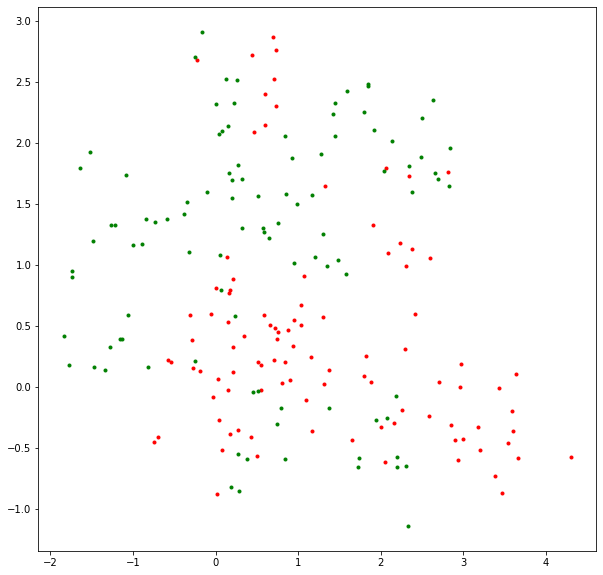

In [5]:
##################################################################################################
## Generate 10 data points such that they are i.i.d. ~ N (mi,[[0.1,0][0,0.1]])
## for all i = 0, 1, . . . , 9.
## Thus a 100 feature vectors are generated. Label them all as (+1).

## Generate 10 data points such that they are i.i.d. ~ N (mi',[[0.1,0][0,0.1]])
## for all i = 0, 1, . . . , 9.
## Thus a 100 feature vectors are generated. Label them all as (-1).

## Generating 2 dataset of 100 datapoint each 

data1=np.random.multivariate_normal(m0[0], [[0.1,0],[0,0.1]], 10)
for i in range(9):
    m=m0[i+1]
    v=[[0.1,0],[0,0.1]]
    temp=np.random.multivariate_normal(m, v, 10)
    data1=np.concatenate((data1, temp), axis=0)
    
data2=np.random.multivariate_normal(m1[0], [[0.1,0],[0,0.1]], 10)
for i in range(9):
    m=m1[i+1]
    v=[[0.1,0],[0,0.1]]
    temp=np.random.multivariate_normal(m, v, 10)
    data2=np.concatenate((data2, temp), axis=0)

## Labeling (+1) and (-1) to first and second dataset respectively

label1=np.ones((100,1))
label2=label1-2
data1=np.concatenate((data1,label1),axis=1)
data2=np.concatenate((data2,label2),axis=1)
data=np.concatenate((data1,data2),axis=0)

##################################################################################################
## Plot the generated features in the form of a scatterplot. Represent the
## features having different labels with different colors.

## Finding the maximuma and minimum value of dataset. so that, we can plot the datapoints perfectly
xmin=data[:,0].min()
xmax=data[:,0].max()
ymin=data[:,1].min()
ymax=data[:,1].max()


## ploting all the datapoints on a plot

newplt_ = plt.figure(figsize=(10, 10))
plt.plot(data1[:,0], data1[:,1], 'r.') 
plt.plot(data2[:,0], data2[:,1], 'g.')

In [6]:
##################################################################################################
## Compute the classifier using the linear model. Plot the classifying line
## along with the scatter plot of the generated features, showing features
## above and below the line. Print the training error (i.e., the average of
## misclassified data) for the classifier computed.


In [7]:
## Adding bias term to each datapoints

b=np.ones((200,1))
data=np.concatenate((data1,data2))
data=np.concatenate((b,data),axis=1)

In [8]:
## Estimating the feature vector beta

a=np.linalg.inv(np.dot((data[:,0:3].T),data[:,0:3]))

es_beta=np.dot(np.dot(a,data[:,0:3].T),data[:,3])
es_beta

array([ 0.08936034,  0.17331919, -0.32358165])

In [12]:
## Data to project the plane on x-y plane

zzdata=np.dot(data[:,0:3],es_beta)
zzdata.resize((200,1))

## Collecting x and y values to draw the classifying line

xa=xmin-0.2
xb=xmax+0.2
xab=[xa,xb]
ya=-(es_beta[0]/es_beta[2])-(es_beta[1]/es_beta[2])*xa
yb=-(es_beta[0]/es_beta[2])-(es_beta[1]/es_beta[2])*xb
yab=[ya,yb]
zzdata.shape

(200, 1)

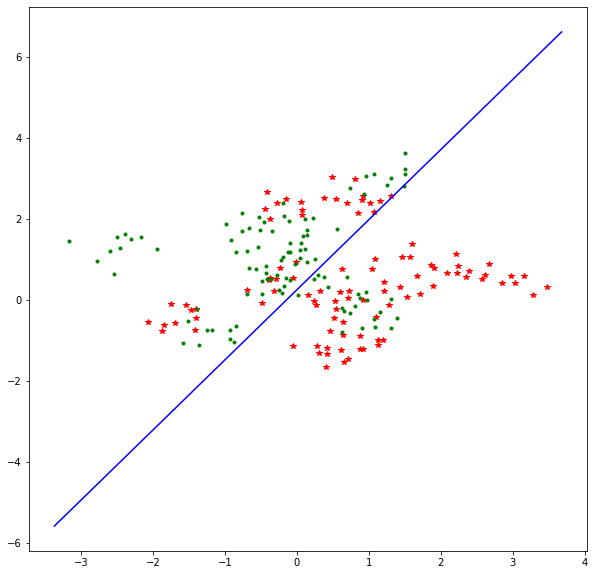

In [10]:
## Plotting the classifer curve

plt_1 = plt.figure(figsize=(10, 10))
plt.plot(data1[:,0], data1[:,1], 'r*') 
plt.plot(data2[:,0], data2[:,1], 'g.')
plt.plot(xab,yab,'b-')

## red colour star represent the (+1) assigned class 
## green dot represent (-1) assigned class

In [11]:
## Calculating error in Linear classifier model
## error= (Number of missclassifed datapoints)/(total number of datapoints)

# if y value for (+1) datapoints is more than its value according to classifying line than it will count as error

error2=0
for i in range(200):
    if(data[i][3]==1):
        if(yvalue(es_beta[0]/es_beta[2],es_beta[1]/es_beta[2],data[i][1])<=data[i][2]):
           error2=error2+1
    else:
           if(yvalue(es_beta[0]/es_beta[2],es_beta[1]/es_beta[2],data[i][1])>=data[i][2]):
              error2=error2+1
print('Training error in Linear Classifier model :',error2/200)

Training error in Linear Classifier model : 0.31


In [12]:
##################################################################################################
## Compute the classifier using k-nearest neighbor method, for k = 15. Plot
## the classifying curve and print the training error

In [13]:
### Appling the K-NN algorithm to given data and classify the whole datapoint into e class ( (+1) and (-1) )

# Adding a new column to assign its class According to KNN
data=np.concatenate((data,np.zeros((200,1))),axis=1)

# Calculating the distance of each to every other point 
# Select the least 15 points and assigning 1 if number of (+1) assigned is more than (-1) assigned data points
for i in range(200):
    pt_dist=[]
    for j in range(200):
        if(i!=j):
            # Calulating distance between each and every point one by one
            dist=euclidean_dist(data[i],data[j])
            pt_dist.append(dist)
    # Converting list to NumPy array
    pt_dist=np.array(pt_dist)
    # Sorting the NumPy array argument wise and move with the first 15 term
    first_k = np.argsort(pt_dist)[:15]
    # temp_sum : No of (+1) assigned datapoint in neighbour of a datapoint
    temp_sum=0
    for k in range(15):
        if(data[first_k[k]][3]==1):
            temp_sum=temp_sum+1
    # temp_sum is greater than 7 means this datapoint belong to class 1
    if(temp_sum/15>=0.5):
        data[i][4]=1
    else:
        data[i][4]=-1

array([[ 1.        ,  1.21216845,  0.23698144,  1.        ,  1.        ],
       [ 1.        ,  2.57395908,  0.53644185,  1.        ,  1.        ],
       [ 1.        ,  1.89088183,  0.35619756,  1.        ,  1.        ],
       [ 1.        ,  1.20979197,  0.44762256,  1.        ,  1.        ],
       [ 1.        ,  2.20514945,  1.13162745,  1.        ,  1.        ],
       [ 1.        ,  2.23250254,  0.67933838,  1.        ,  1.        ],
       [ 1.        ,  2.24210503,  0.85608146,  1.        ,  1.        ],
       [ 1.        ,  1.53403452,  0.06862842,  1.        ,  1.        ],
       [ 1.        ,  2.08484779,  0.67735259,  1.        ,  1.        ],
       [ 1.        ,  1.70531934,  0.15110616,  1.        ,  1.        ],
       [ 1.        ,  1.09492962, -0.41474699,  1.        , -1.        ],
       [ 1.        ,  1.12849289, -1.09172553,  1.        ,  1.        ],
       [ 1.        ,  0.523281  , -0.42873016,  1.        ,  1.        ],
       [ 1.        ,  0.63817973, -0.8

In [14]:
## Calculating the training error in K-NN model
## error= (Number of missclassifed datapoints)/(total number of datapoints)
error3=0
for i in range(200):
    if(data[i][3]!=data[i][4]):
        error3=error3+1
print('Training error in K-NN model for k=15 :',error3/200)

Training error in K-NN model for k=15 : 0.195


In [15]:
## Plot the classifying curve 
## Divide the x-axis and y-axis into 100 parts each 
## For every possible point check its class by checking its k nearest neighbour
x=np.linspace(xmin-0.2,xmax+0.2,100)
yy=np.linspace(ymin-0.2,ymax+0.2,100)
arr=list()
for i in range(100):
    for j in range(100):
        # ptdist store the distance from a point to every other point
        ptdist=[]
        temp_arr=list([x[i],yy[j],0])
        for k in range(200):
            # Calulating distance between each and every point one by one
            dist=math.sqrt((x[i]-data[k][1])**2+(yy[j]-data[k][2])**2)
            ptdist.append(dist)
        # Converting list to NumPy array
        ptdist=np.array(ptdist)
        # Sorting the NumPy array argument wise and move with the first 15 term
        firstk = np.argsort(ptdist)[:15]
        # tempsum : No of (+1) assigned datapoint in neighbour of a datapoint
        tempsum=0
        for k in range(15):
            if(data[firstk[k]][3]==1):
                tempsum=tempsum+1
        # tempsum is greater than 7 means this datapoint belong to class 1
        if(tempsum/15>=0.5):
            temp_arr[2]=1
        else:
            temp_arr[2]=-1
        arr.append(temp_arr)

In [16]:
arr=np.array(arr)

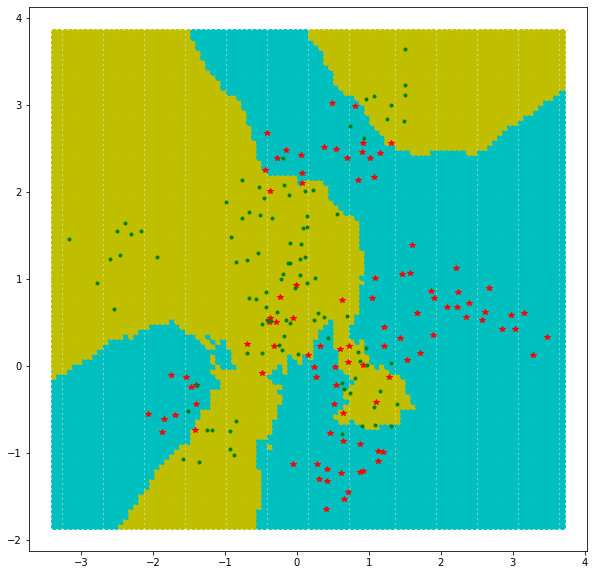

In [17]:
## 2 different colour show 2 different class
plt_1 = plt.figure(figsize=(10, 10))

for i in range(10000):
    if(arr[i][2]==1):
        plt.plot(arr[i][0],arr[i][1],'co')
    else:
        plt.plot(arr[i][0],arr[i][1],'yo')
plt.plot(data1[:,0], data1[:,1], 'r*') 
plt.plot(data2[:,0], data2[:,1], 'g.')
    

In [18]:
##################################################################################################
## Compute the classifier using k-nearest neighbor method, for k = 1. Plot
## the classifying curve and print the training error

In [19]:
## Repeating the same step as I have done in question 3 with k=1 

data=np.concatenate((data,np.zeros((200,1))),axis=1)
for i in range(200):
    pt_dist1=[]
    for j in range(200):
        if(i!=j):
            dist1=euclidean_dist(data[i],data[j])
            pt_dist1.append(dist1)
    pt_dist1=np.array(pt_dist1)
    first_k1 = np.argsort(pt_dist1)[:1]
    temp_sum1=0
    for k in range(1):
        if(data[first_k[k]][3]==1):
            temp_sum1=temp_sum1+1
    if(temp_sum1/1>=0.5):
        data[i][5]=1
    else:
        data[i][5]=-1

In [20]:
error4=0
for i in range(200):
    if(data[i][5]!=data[i][3]):
        error4=error4+1
print('Training error in K-NN model for k=1 :',error4/200)

Training error in K-NN model for k=1 : 0.5


In [21]:
## Plot the classifying curve 
## Divide the x-axis and y-axis into 100 parts each 
## For every possible point check its class by checking its k nearest neighbour

arr1=list()
for i in range(100):
    for j in range(100):
        # ptdist1 store the distance from a point to every other point
        ptdist1=[]
        temp_arr1=list([x[i],yy[j],0])
        for k in range(200):
            # Calulating distance between each and every point one by one
            dist=math.sqrt((x[i]-data[k][1])**2+(yy[j]-data[k][2])**2)
            ptdist1.append(dist)
        # Converting list to NumPy array
        ptdist1=np.array(ptdist1)
        # Sorting the NumPy array argument wise and move with the first 15 term
        firstk1 = np.argsort(ptdist1)[:1]
        # tempsum1 : No of (+1) assigned datapoint in neighbour of a datapoint
        tempsum1=0
        for k in range(1):
            if(data[firstk1[k]][3]==1):
                tempsum1=tempsum1+1
        # tempsum1 is greater than 0.5 means this datapoint belong to class 1
        if(tempsum1/1>=0.5):
            temp_arr1[2]=1
        else:
            temp_arr1[2]=-1
        arr1.append(temp_arr1)
arr=np.array(arr)

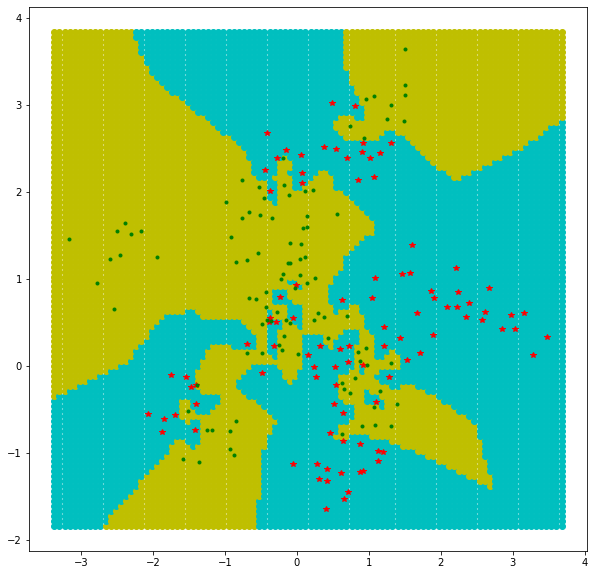

In [22]:
## 2 different colour show 2 different class
plt_2 = plt.figure(figsize=(10, 10))

for i in range(10000):
    if(arr1[i][2]==1):
        plt.plot(arr1[i][0],arr1[i][1],'co')
    else:
        plt.plot(arr1[i][0],arr1[i][1],'yo')
plt.plot(data1[:,0], data1[:,1], 'r*') 
plt.plot(data2[:,0], data2[:,1], 'g.')
    

In [23]:
##################################################################################################
## Generate 10000 test vectors as follows: Generate 5000 feature vectors as
## (i.e., 500 vectors for each mi), and label them all as (+1).
## Similarly, generate 5000 more feature vectors (i.e.,
## 500 vectors per mi′ and label them all as (−1)
## Assume that the labels correspond to the true responses
## Compute and print the test error based on the classifiers derived using 
## (i) linear model 
## (ii) 15-NN 
## (iii) 1-NN.


In [24]:

## Repeating same steps of previous 3 question with 10000 datapoints
## Question 5(a) : Generate dataset
## Linear classifier Model

newdata1=np.random.multivariate_normal(m0[0], [[0.1,0],[0,0.1]], 500)
for i in range(9):
    m=m0[i+1]
    v=[[0.1,0],[0,0.1]]
    temp=np.random.multivariate_normal(m, v, 500)
    newdata1=np.concatenate((newdata1, temp), axis=0)
    
newdata2=np.random.multivariate_normal(m1[0], [[0.1,0],[0,0.1]], 500)
for i in range(9):
    m=m1[i+1]
    v=[[0.1,0],[0,0.1]]
    temp=np.random.multivariate_normal(m, v, 500)
    newdata2=np.concatenate((newdata2, temp), axis=0)

## Labeling (+1) and (-1) to first and second dataset respectively

newlabel1=np.ones((5000,1))
newlabel2=newlabel1-2
newdata1=np.concatenate((newdata1,newlabel1),axis=1)
newdata2=np.concatenate((newdata2,newlabel2),axis=1)
newdata=np.concatenate((newdata1,newdata2),axis=0)

## Finding the maximuma and minimum value of dataset. so that, we can plot the datapoints perfectly
newxmin=newdata[:,0].min()
newxmax=newdata[:,0].max()
newymin=newdata[:,1].min()
newymax=newdata[:,1].max()

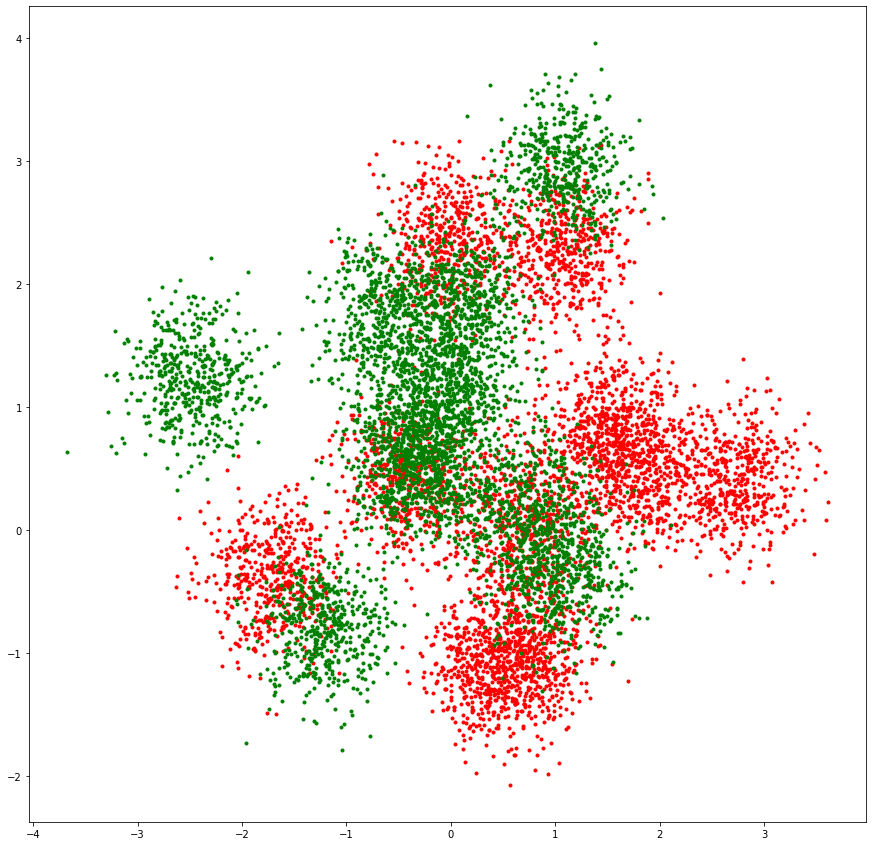

In [25]:
newb=np.ones((10000,1))
newdata=np.concatenate((newdata1,newdata2))
newdata=np.concatenate((newb,newdata),axis=1)

newplt_ = plt.figure(figsize=(15, 15))
plt.plot(newdata1[:,0], newdata1[:,1], 'r.') 
plt.plot(newdata2[:,0], newdata2[:,1], 'g.')

In [26]:
newa=np.linalg.inv(np.dot((newdata[:,0:3].T),newdata[:,0:3]))

newes_beta=np.dot(np.dot(newa,newdata[:,0:3].T),newdata[:,3])

In [27]:
zzdata=np.dot(newdata[:,0:3],newes_beta)
zzdata.resize((10000,1))

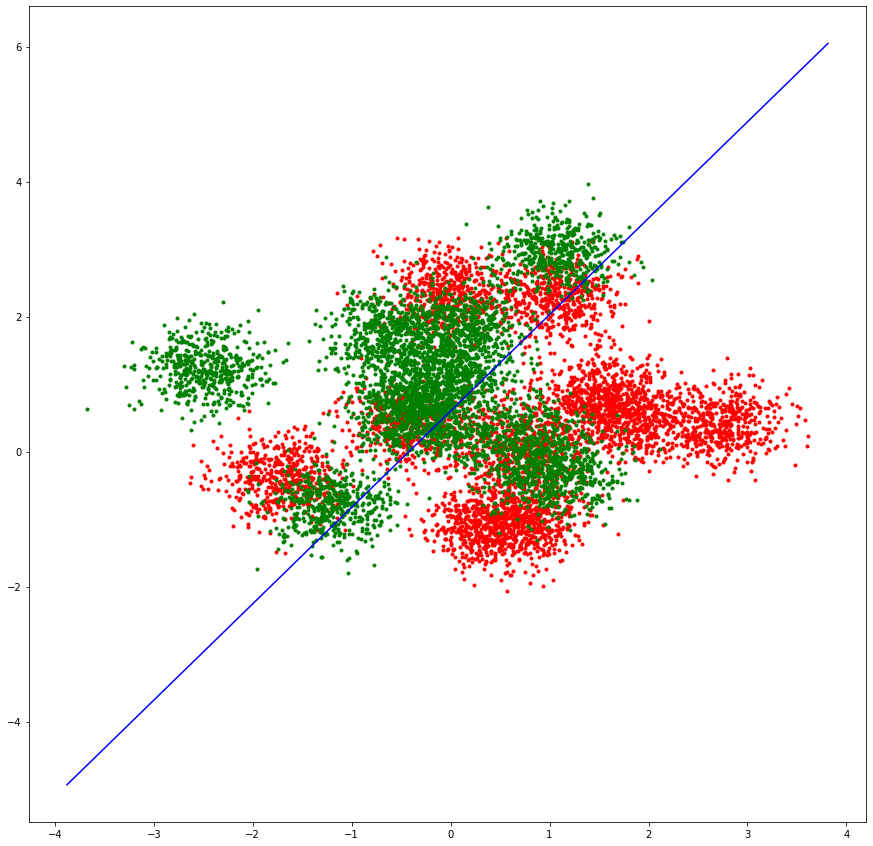

In [28]:
newx=np.linspace(newxmin-0.2,newxmax+0.2,100)
newy=-(newes_beta[0]/newes_beta[2])-(newes_beta[1]/newes_beta[2])*x
newplt_1 = plt.figure(figsize=(15, 15))
plt.plot(newdata1[:,0], newdata1[:,1], 'r.') 
plt.plot(newdata2[:,0], newdata2[:,1], 'g.')
plt.plot(newx,newy,'b-')

In [29]:
## Calulating training error in linear classifying curve
newerror2=0
for i in range(10000):
    if(newdata[i][3]==1):
        if(yvalue(newes_beta[0]/newes_beta[2],newes_beta[1]/newes_beta[2],newdata[i][1])<=newdata[i][2]):
           newerror2=newerror2+1
    else:
           if(yvalue(newes_beta[0]/newes_beta[2],newes_beta[1]/newes_beta[2],newdata[i][1])>=newdata[i][2]):
              newerror2=newerror2+1
print('Training error in Linear Classifier model :',newerror2/10000)

Training error in Linear Classifier model : 0.2981


In [30]:
### Question 5(b)
### K-NN mode with k=15
newdata=np.concatenate((newdata,np.zeros((10000,1))),axis=1)

for i in range(10000):
    newpt_dist=[]
    for j in range(10000):
        if(i!=j):
            newdist=euclidean_dist(newdata[i],newdata[j])
            newpt_dist.append(newdist)
    newpt_dist=np.array(newpt_dist)
    newfirst_k = np.argsort(newpt_dist)[:15]
    newtemp_sum=0
    for k in range(15):
        if(newdata[newfirst_k[k]][3]==1):
            newtemp_sum=newtemp_sum+1
    if(newtemp_sum/15>=0.5):
        newdata[i][4]=1
    else:
        newdata[i][4]=-1

In [31]:
newerror3=0
for i in range(10000):
    if(newdata[i][3]!=newdata[i][4]):
        newerror3=newerror3+1
print('Training error in K-NN model for k=15 :',newerror3/10000)

Training error in K-NN model for k=15 : 0.1873


In [32]:
### Question 5(c)
### K-NN mode with k=1

newdata=np.concatenate((newdata,np.zeros((10000,1))),axis=1)

for i in range(10000):
    newptdist=[]
    for j in range(10000):
        if(i!=j):
            newdist=euclidean_dist(newdata[i],newdata[j])
            newptdist.append(newdist)
    newptdist=np.array(newptdist)
    newfirstk = np.argsort(newptdist)[:1]
    newtempsum=0
    for k in range(1):
        if(newdata[newfirstk[k]][3]==1):
            newtempsum=newtempsum+1
    if(newtempsum/1>=0.5):
        newdata[i][5]=1
    else:
        newdata[i][5]=-1

In [33]:
newerror4=0
for i in range(10000):
    if(newdata[i][3]!=newdata[i][5]):
        newerror4=newerror4+1
print('Training error in K-NN model for k=1 :',newerror4/10000)

Training error in K-NN model for k=1 : 0.2275
